In [ ]:
pip install numpy

In [ ]:
!pip install numpy matplotlib wordcloud keras

In [79]:
!pip install keras

In [82]:
!pip install matplotlib-venn

In [83]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.3_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.1 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=818870abfc94e26becc65e52af5a29581c6208b8ecfd1a84a1b26e8b45fbe5ed
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


In [84]:
!apt-get -qq install -y graphviz && pip install pydot

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.20.0-dev20250410


In [107]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import LSTM
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from keras import metrics

In [ ]:
# get data files
TRAIN_DATA_URL = "https://raw.githubusercontent.com/beaucarnes/fcc_python_curriculum/master/sms/train-data.tsv"
TEST_DATA_URL  = "https://raw.githubusercontent.com/beaucarnes/fcc_python_curriculum/master/sms/valid-data.tsv"

train_file_path = tf.keras.utils.get_file("train-data.tsv", TRAIN_DATA_URL)
test_file_path  = tf.keras.utils.get_file("valid-data.tsv", TEST_DATA_URL)

In [ ]:
print(train_file_path)
print(test_file_path)

/root/.keras/datasets/train-data.tsv
/root/.keras/datasets/valid-data.tsv


In [ ]:
names = ["class","message"]

In [109]:
df_train = pd.read_csv(train_file_path, sep="\t", header=None, names=['y', 'x'])
df_train.columns = ['label', 'text']
df_train.head()

,label,text
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [112]:
df_test = pd.read_csv(train_file_path, sep="\t", header=None, names=['y', 'x'])
df_test.columns = ['label', 'text']
df_test.head()

,label,text
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [ ]:
print(len(df_train))
print(len(df_test))

4179
4179


In [ ]:
#Handle categorical values
y_train = pd.get_dummies(df_train['y'].astype('category'))
y_test = pd.get_dummies(df_test['y'].astype('category'))
y_train[:5]

,ham,spam
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


Text(0.5, 1.0, 'Number of ham and spam messages')

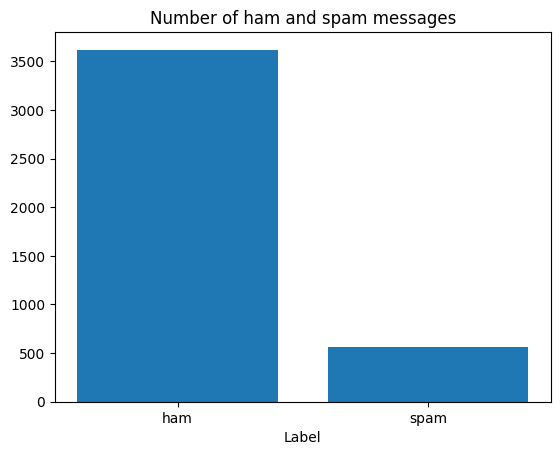

In [ ]:
bar = df_train['y'].value_counts()
plt.bar(bar.index, bar)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Initialize stopwords and lemmatizer
stopwords_eng = set(stopwords.words('english'))
len(stopwords_eng)
lemmatizer = WordNetLemmatizer()

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)

198

In [ ]:
def clean_txt(txt):
    txt = re.sub(r'([^\s\w])+', ' ', txt)
    txt = " ".join([lemmatizer.lemmatize(word) for word in txt.split()
                    if not word in stopwords_eng])
    txt = txt.lower()
    return txt

In [ ]:
X_train = df_train['x'].apply(lambda x: clean_txt(x))
X_train[:5]

,x
0,ahhhh woken bad dream u tho dont like u right ...
1,never nothing
2,u sound like manky scouse boy steve like trave...
3,mum say wan go go shun bian watch da glass exh...
4,never lei v lazy got wat dat day ü send da url...


In [ ]:
#Vectorize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence  # used later for padding, not shown in current snippet

# Keep top 1000 frequently occurring words
max_words = 1000

# Cut off the words after seeing 500 words in each document
max_len = 500

t = Tokenizer(num_words=max_words)  # Initialize tokenizer to keep only the top 1000 words

In [ ]:
t.fit_on_texts(X_train)

In [ ]:
# Transform each text to a sequence of integers
sequences = t.texts_to_sequences(X_train)
sequences[:5]  # Show first 5 sequences

[[309, 227, 1, 587, 42, 15, 1, 90, 359, 13, 103, 54, 228, 86],
 [195, 252],
 [1, 310, 15, 219, 15, 43, 311, 37, 386, 1, 6, 338, 422],
 [477, 58, 188, 9, 9, 243, 43],
 [195, 478, 167, 820, 18, 77, 212, 12, 28, 22, 43, 124, 70, 24]]

In [ ]:
# Make all rows of equal length
sequences_matrix = pad_sequences(sequences, maxlen=max_len)
sequences_matrix[:5]

array([[  0,   0,   0, ...,  54, 228,  86],
       [  0,   0,   0, ...,   0, 195, 252],
       [  0,   0,   0, ...,   6, 338, 422],
       [  0,   0,   0, ...,   9, 243,  43],
       [  0,   0,   0, ..., 124,  70,  24]], dtype=int32)

In [ ]:
i = tf.keras.layers.Input(shape=[max_len])
x = tf.keras.layers.Embedding(max_words, 50, input_length=max_len)(i)
x = tf.keras.layers.LSTM(64)(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation='relu')(x)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model = tf.keras.models.Model(inputs=i, outputs=x)
model.compile(
    loss='binary_crossentropy',
    optimizer='RMSprop',
    metrics=['accuracy']
)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 500, 50)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,337 (376.32 KB)

 Trainable params: 96,337 (376.32 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
import pandas as pd
data = pd.concat([df_train, df_test], ignore_index=True)

In [124]:
tags = data["label"]
texts = data["text"]
num_max = 1000
le = LabelEncoder()
tags = le.fit_transform(tags)
tok = Tokenizer(num_words=num_max)
tok.fit_on_texts(texts)
mat_data = tok.texts_to_matrix(texts,mode='count')
mat_dftrain = tok.texts_to_matrix(df_train,mode='count')
mat_dftest = tok.texts_to_matrix(df_test,mode='count')

max_len = 100
x_train = tok.texts_to_sequences(df_train["text"])
x_test = tok.texts_to_sequences(df_test["text"])
train = sequence.pad_sequences(x_train,maxlen=max_len)
max_len = 100
test = sequence.pad_sequences(x_test,maxlen=max_len)

labeltrain = df_train["label"]
traintags = le.fit_transform(labeltrain)
labeltest = df_test["label"]
testtags = le.fit_transform(labeltest)

In [125]:
mat_data = tok.texts_to_matrix(texts,mode='count')
mat_train = tok.texts_to_matrix(df_train,mode='count')
mat_test = tok.texts_to_matrix(df_test,mode='count')

In [87]:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [126]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc',metrics.binary_accuracy])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [129]:
r = model.fit(
    train,
    traintags,
    batch_size=32,
    epochs=10,
    verbose=1,
    validation_split=0.3,  # <-- comma added here
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001)]
)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 290ms/step - acc: 0.8681 - binary_accuracy: 0.8681 - loss: nan - val_acc: 0.8517 - val_binary_accuracy: 0.8517 - val_loss: nan
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 299ms/step - acc: 0.8728 - binary_accuracy: 0.8728 - loss: nan - val_acc: 0.8517 - val_binary_accuracy: 0.8517 - val_loss: nan


In [133]:
_,accuracy,_ =model.evaluate(test,testtags)
accuracy

131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - acc: 0.8709 - binary_accuracy: 0.8709 - loss: nan


0.8659966588020325

In [135]:
import numpy as np

string = ["What you doing? how are you?"]
inputstr = tok.texts_to_sequences(string)
input_array = np.array(inputstr)  # Convert to NumPy array
pred = model.predict(input_array)
output = [pred[0][0], 'ham']
output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


[np.float32(nan), 'ham']

In [145]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 100  # 👈 Use the same number you used during training

def predict_message(pred_text):
    input_seq = tok.texts_to_sequences([pred_text])
    padded_seq = pad_sequences(input_seq, maxlen=MAX_LEN)
    pred = model.predict(padded_seq)[0][0]
    return 'spam' if pred >= 0.5 else 'ham'

pred_text = "how are you doing today?"
prediction = predict_message(pred_text)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
ham


In [166]:
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You haven't passed yet. Keep trying.")
  else:
    print("You passed the challenge. Great job!")

test_predictions()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
You passed the challenge. Great job!
